# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 7: Shooting Method for BVPs

### Professor: Dane Taylor
### Date: Spring 2024


In [21]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. Shooting Method Example 1


In [22]:
def forward_Euler(ti,F,y0): 
    
    h = ti[1]-ti[0]
    N = len(ti)-1
    
    f1 = F[0]
    f2 = F[1]
    
    yi = zeros((len(ti),2))
    yi[0] = y0
    for i in range(N):
        yi[i+1] = yi[i,0] + h*f1(ti[i],yi[i]), yi[i,1] + h*f2(ti[i],yi[i])
    return yi

In [23]:
def f1(t,y_vec):  return y_vec[1]
def f2(t,y_vec):  return (2+4*t**2) *y_vec[0]
F = [f1,f2]

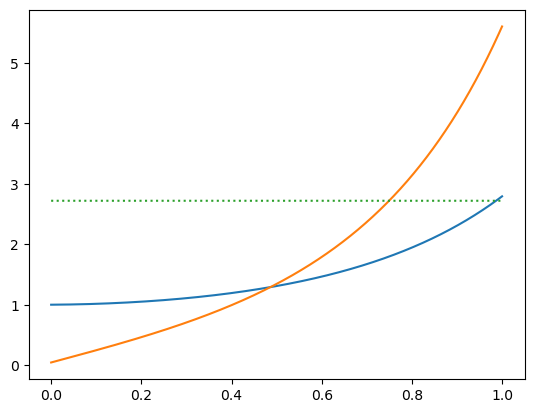

In [24]:
t0 = 0
T = 1
N = 1000000
h = (T-t0)/N
ti = linspace(t0,T,N+1)

s = .045
y0 = 1,s
yi = forward_Euler(ti,F,y0)
plot(ti,yi);
plot(ti,ones(N+1)*exp(1),':')

In [25]:
yi[-1]

array([2.79144264, 5.59943743])

In [26]:
exp(1)

2.718281828459045

In [27]:
G = exp(1) - yi[-1][0]
G

-0.0731608142454303

In [28]:
s = -1
y0 = 1,s
yi = forward_Euler(ti,F,y0)
G = exp(1) - yi[-1][0]
G

1.6259264463345149

In [29]:
s = 2
y0 = 1,s
yi = forward_Euler(ti,F,y0)
G = exp(1) - yi[-1][0]
G

-3.2518360242304083

In [30]:
s = 0
y0 = 1,s
yi = forward_Euler(ti,F,y0)
G = exp(1) - yi[-1][0]
G

5.622813060934817e-06

In [31]:
t0 = 0
T = 1
N = 1000
#N = 10000000
h = (T-t0)/N
ti = linspace(t0,T,N+1)
yi = forward_Euler(ti,F,y0)
G = exp(1) - yi[-1][0]
G

0.005608325924097102

### The error  $G(S)$ at the boundary will always be as bad as the global error $E_N$ for the IVP solver
* above, we used the true value   $s^*=0$ and there was considerable error since the IVP solver was poor.

## 2. Implementing the root-finding algorithm
* We must build a function G(s)


In [32]:
def G(s):
    t0 = 0
    T = 1
    N = 100000
    h = (T-t0)/N
    ti = linspace(t0,T,N+1)
    y0 = 1,s
    yi = forward_Euler(ti,F,y0)
    return exp(1) - yi[-1][0]     

In [33]:
print(G(-1),G(2),G(0))

1.625948605822019 -3.25172853117883 5.6226821834926e-05


In [34]:
def bisection(f,a,b,tol=10**-14):
    if sign(f(a))==0: return a
    if sign(f(b))==0: return b
    if sign(f(a))==sign(f(b)):
        print('bad starting points')
        return 
    while abs(a-b) > tol:
        print(a,b)
        c = (a+b)/2
        if sign(f(c))==0: return c
        if sign(f(c)) == sign(f(a)):
            a = c
        else:
            b = c 
        
    return (a+b)/2

In [35]:
lower,upper = -1,2
bisection(G,lower,upper)

-1 2
-1 0.5
-0.25 0.5
-0.25 0.125
-0.0625 0.125
-0.0625 0.03125
-0.015625 0.03125
-0.015625 0.0078125
-0.00390625 0.0078125
-0.00390625 0.001953125
-0.0009765625 0.001953125
-0.0009765625 0.00048828125
-0.000244140625 0.00048828125
-0.000244140625 0.0001220703125
-6.103515625e-05 0.0001220703125
3.0517578125e-05 0.0001220703125
3.0517578125e-05 7.62939453125e-05
3.0517578125e-05 5.340576171875e-05
3.0517578125e-05 4.1961669921875e-05
3.0517578125e-05 3.62396240234375e-05
3.337860107421875e-05 3.62396240234375e-05
3.337860107421875e-05 3.4809112548828125e-05
3.409385681152344e-05 3.4809112548828125e-05
3.445148468017578e-05 3.4809112548828125e-05
3.445148468017578e-05 3.463029861450195e-05
3.454089164733887e-05 3.463029861450195e-05
3.454089164733887e-05 3.458559513092041e-05
3.456324338912964e-05 3.458559513092041e-05
3.4574419260025024e-05 3.458559513092041e-05
3.458000719547272e-05 3.458559513092041e-05
3.458000719547272e-05 3.4582801163196564e-05
3.458140417933464e-05 3.458280116319

3.458213004936539e-05

## 3. BVP System Example

In [43]:
def f1(t,y_vec):  return y_vec[0] - 3 *y_vec[0]*y_vec[1]
def f2(t,y_vec):  return -6*(t*y_vec[1] + log(y_vec[0]))
F = [f1,f2]

def G(s):
    t0 = 0
    T = 1
    N = 100000
    h = (T-t0)/N
    ti = linspace(t0,T,N+1)
    y0 = 1,s
    yi = forward_Euler(ti,F,y0)
    return -2/3 - yi[-1][1]     

In [44]:
lower,upper = -2,2
s_star = bisection(G,lower,upper)
s_star

-2 2
0.0 2
0.0 1.0
0.0 0.5
0.25 0.5
0.25 0.375
0.3125 0.375
0.3125 0.34375
0.328125 0.34375
0.328125 0.3359375
0.33203125 0.3359375
0.33203125 0.333984375
0.3330078125 0.333984375
0.3330078125 0.33349609375
0.333251953125 0.33349609375
0.333251953125 0.3333740234375
0.33331298828125 0.3333740234375
0.33331298828125 0.333343505859375
0.33331298828125 0.3333282470703125
0.33332061767578125 0.3333282470703125
0.3333244323730469 0.3333282470703125
0.3333263397216797 0.3333282470703125
0.3333263397216797 0.3333272933959961
0.3333263397216797 0.3333268165588379
0.3333263397216797 0.3333265781402588
0.33332645893096924 0.3333265781402588
0.33332645893096924 0.333326518535614
0.3333264887332916 0.333326518535614
0.3333264887332916 0.3333265036344528
0.3333264887332916 0.3333264961838722
0.3333264924585819 0.3333264961838722
0.3333264943212271 0.3333264961838722
0.3333264943212271 0.33332649525254965
0.3333264943212271 0.33332649478688836
0.3333264945540577 0.33332649478688836
0.333326494670473

0.33332649476664145

In [45]:
G(s_star)

-2.4313884239290928e-14

* We can also use the built-in root-finding from scipy

In [47]:
from scipy.optimize import fixed_point as fp

In [56]:
g = lambda s: s-G(s)

s_star2 = fp(g,0.5,xtol=1e-15)
s_star2

array(0.33332649)

In [57]:
G(s_star)

-2.4313884239290928e-14

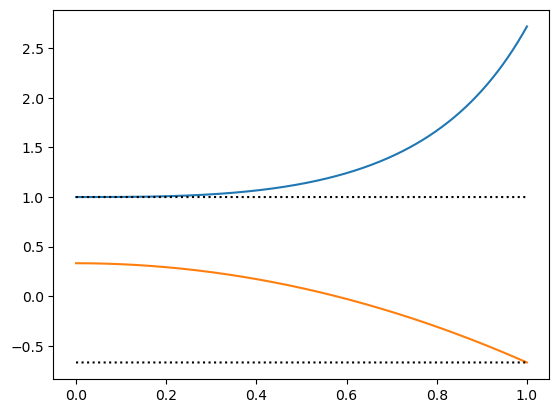

In [42]:
 t0 = 0
T = 1
N = 100000
h = (T-t0)/N
ti = linspace(t0,T,N+1)
y0 = 1,s_star
yi = forward_Euler(ti,F,y0)
plot(ti,yi);
plot(ti,ones(len(ti)),'k:');
plot(ti,ones(len(ti))*-2/3,'k:');

In [40]:
print(yi[0][0],yi[-1][1])

1.0 -0.6666666666666423
